In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))


x = np.linspace(0.75, 1.25, 201)

pparam = dict(xlabel="Voltage (mV)", ylabel=r"Current ($\mu$A)")

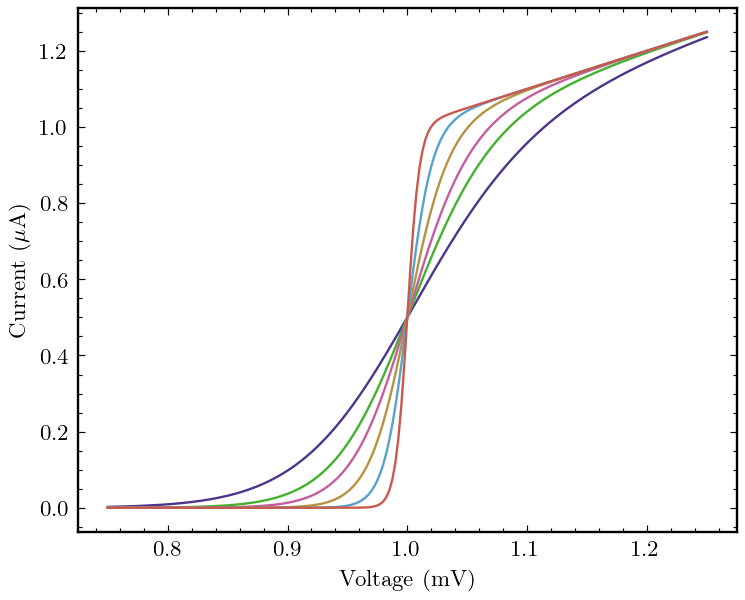

In [7]:
plt.style.use("tex")

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)
plt.show()

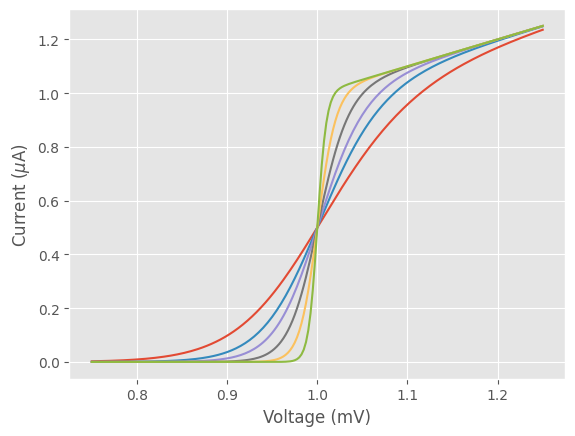

In [5]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)
plt.show()

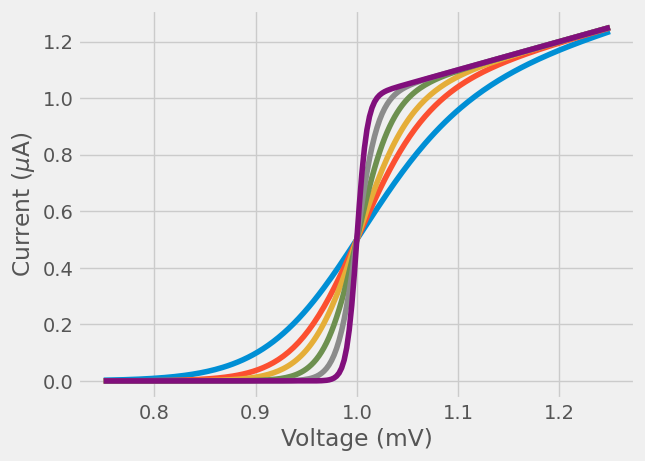

In [6]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)
plt.show()

There are many many default stylefiles (check them out here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). But just like academic writing, everyone has their own style..!

You can temporarily use a style file without changing the default:

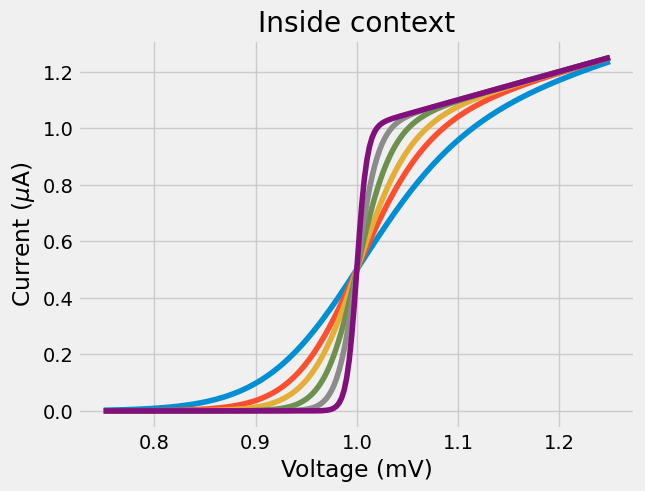

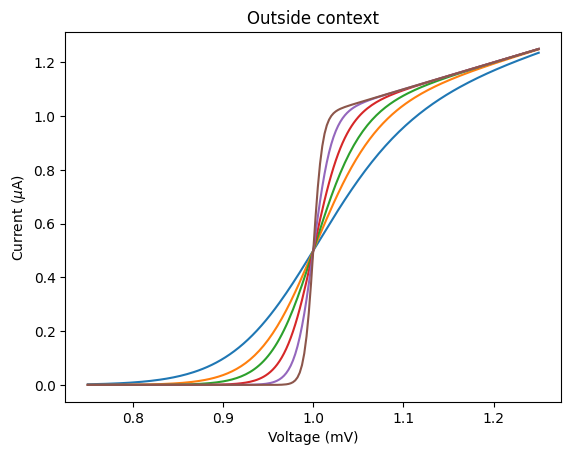

In [ ]:
plt.style.use("default")

with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.set(**pparam)
    ax.set_title("Inside context")
    plt.show()

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)
ax.set_title("Outside context")
plt.show()

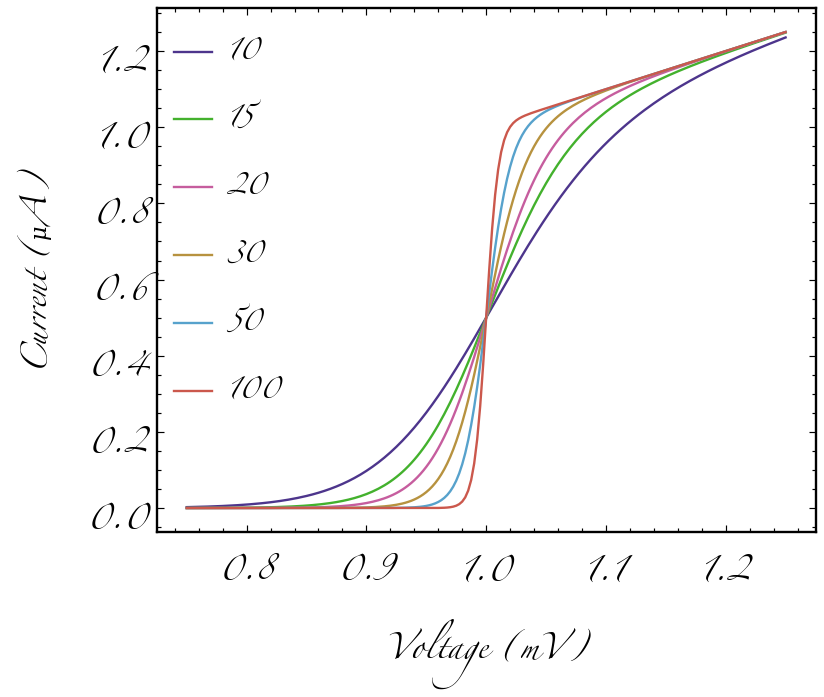

In [5]:
plt.style.use("science_original.mplstyle")

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)
plt.legend()
plt.show()

In [ ]:
plt.style.use(["science", "tex"])

What about choosing colors?  https://medialab.github.io/iwanthue/ 

What about choosing font?

# Semantic composition of figures

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create some fake data.
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 2.0)
y2 = np.cos(2 * np.pi * x2)

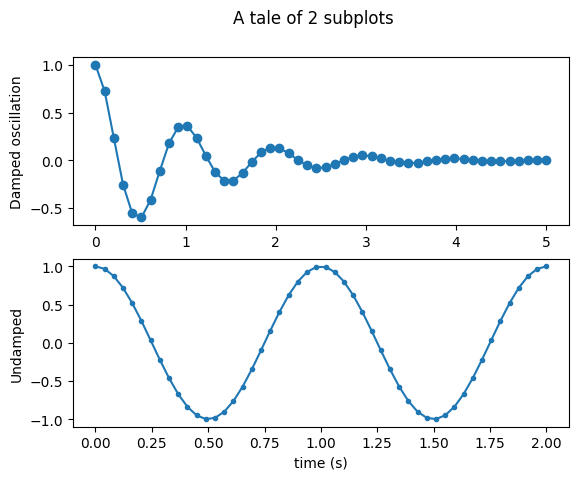

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("A tale of 2 subplots")

ax1.plot(x1, y1, "o-")
ax1.set_ylabel("Damped oscillation")

ax2.plot(x2, y2, ".-")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("Undamped")

plt.show()

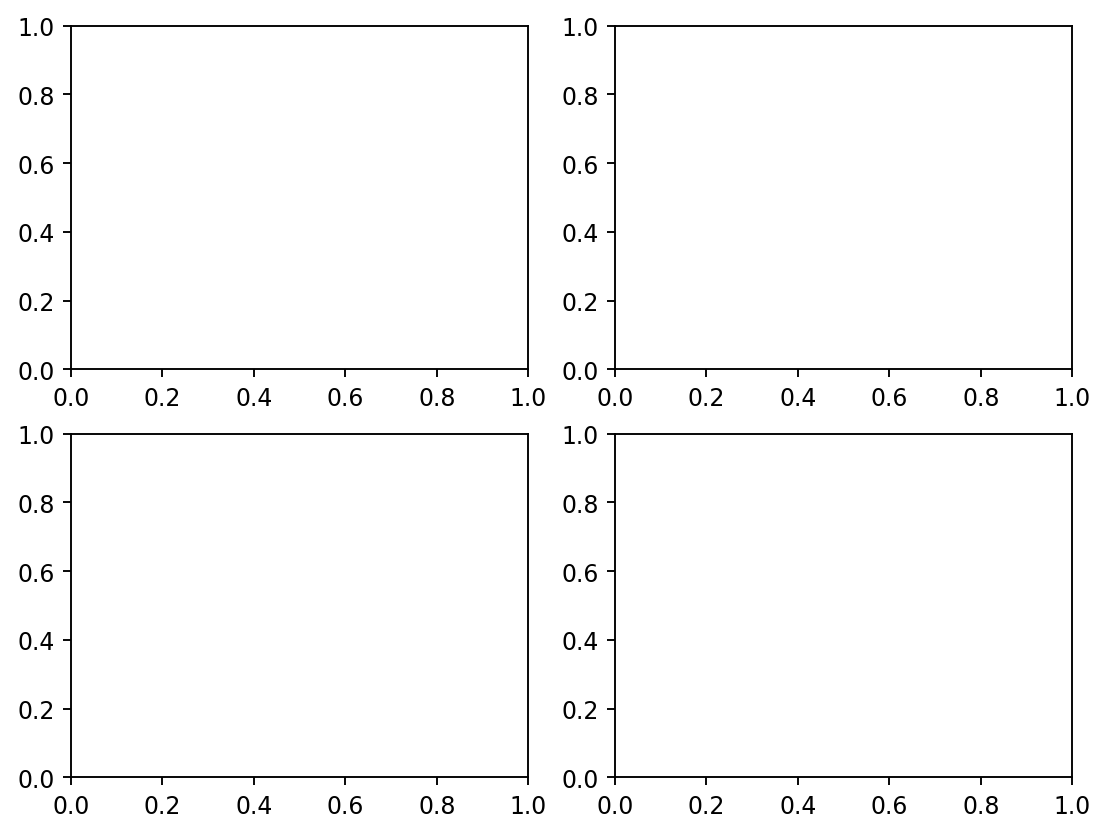

In [68]:
mosaic = """
    AB
    CD
    """

fig = plt.figure(layout="constrained")
axes = fig.subplot_mosaic(mosaic)
plt.show()

# Gridspec modification

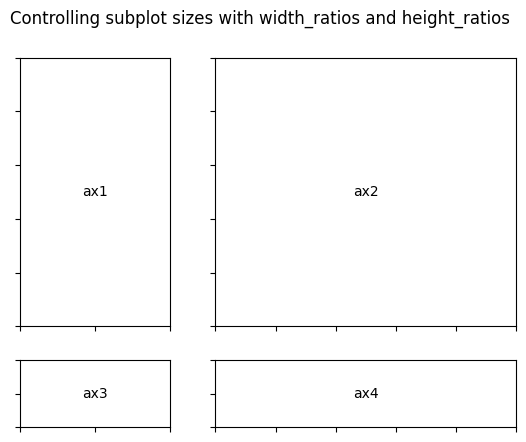

In [33]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i + 1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios")

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

annotate_axes(fig)
plt.show()

<Figure size 640x480 with 0 Axes>

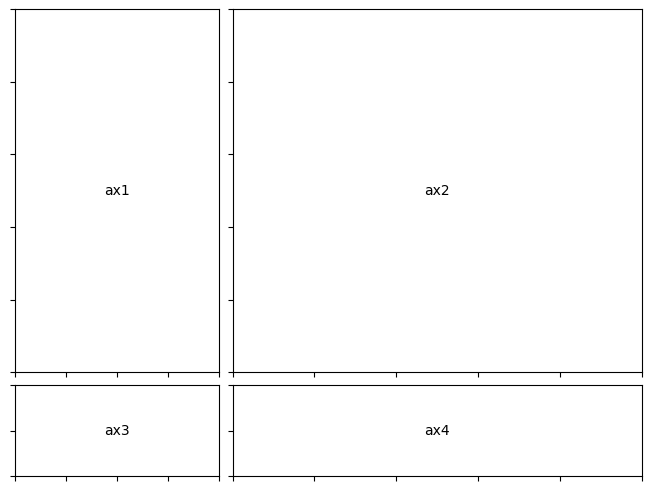

In [36]:
mosaic = """
    AB
    CD
    """

fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 2], "height_ratios": [4, 1]}
)

annotate_axes(fig)
plt.show()

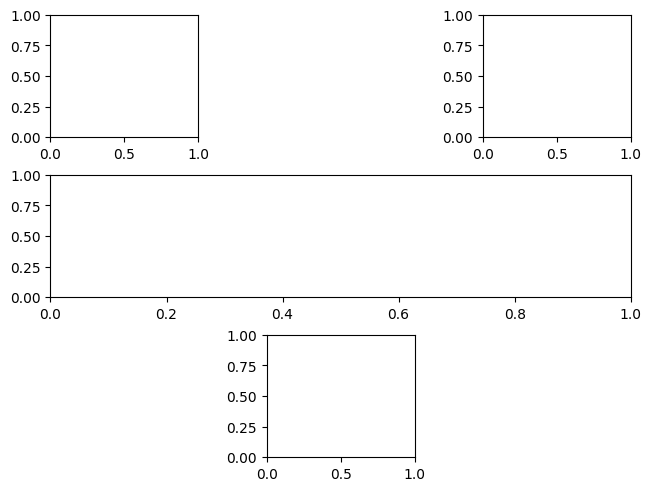

In [52]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    A.C
    BBB
    .D.
    """
)
# identify_axes(axd)
plt.show()

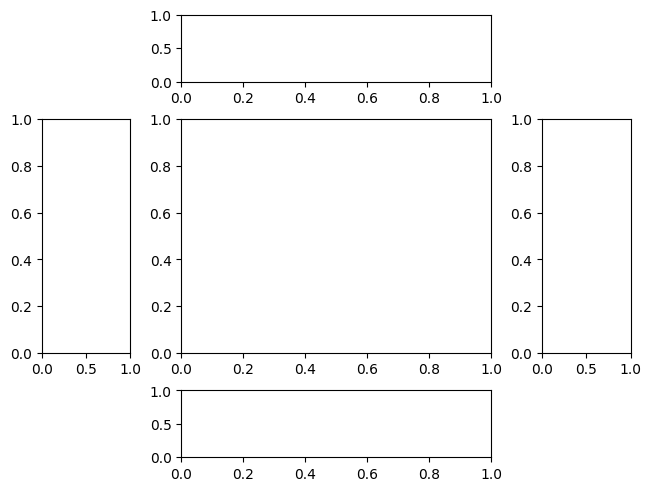

In [55]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    .a.
    bAc
    .d.
    """,
    # set the height ratios between the rows
    height_ratios=[1, 3.5, 1],
    # set the width ratios between the columns
    width_ratios=[1, 3.5, 1],
)
plt.show()

# Colorbar trick

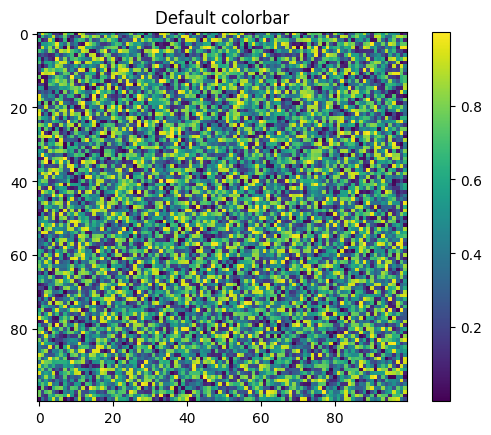

In [ ]:
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure()
plt.imshow(np.random.random((100, 100)))

plt.colorbar()
plt.title("Default colorbar")
plt.show()

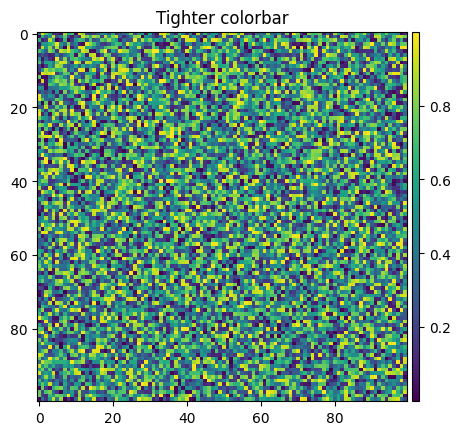

In [ ]:
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure()
plt.imshow(np.random.random((100, 100)))

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(aspect=50, pad=0.01)
plt.title("Tighter colorbar")
plt.show()

# Bigger figures in jupyter etc

In [ ]:
from IPython import get_ipython

ipython = get_ipython()
ipython.magic('config IPython.matplotlib.backend = "retina"')
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams["figure.dpi"] = 170
rcParams["savefig.dpi"] = 300

# Saving figures for papers

In [3]:
def get_figure_size(fig_width_pt, square=False):
    inches_per_pt = 1.0 / 72.00  # Convert pt to inches
    golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Most aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt  # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width * golden_mean
    return [fig_width, fig_height]

In [13]:
get_figure_size(242.26653)

[3.3648129166666663, np.float64(2.0795687482846676)]

In [8]:
def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))


x = np.linspace(0.75, 1.25, 201)

pparam = dict(xlabel="Voltage (mV)", ylabel=r"Current ($\mu$A)")

plt.style.use("science")

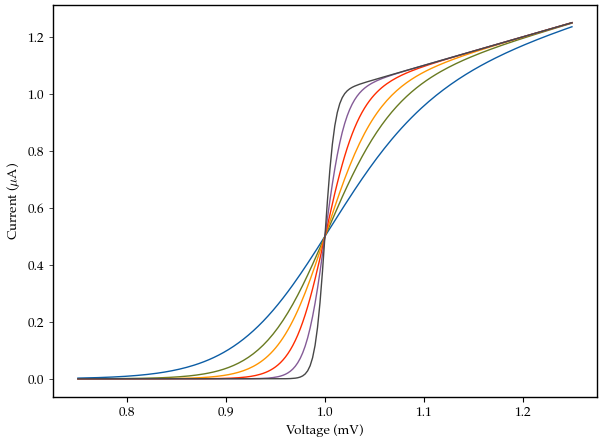

In [16]:
fig, ax = plt.subplots(figsize=[6, 4.404500166111042], constrained_layout=True)
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
ax.set(**pparam)

plt.savefig(
    "figures/example_output.pdf",
    dpi=300,
    pad_inches=0,
)

## Rasterization

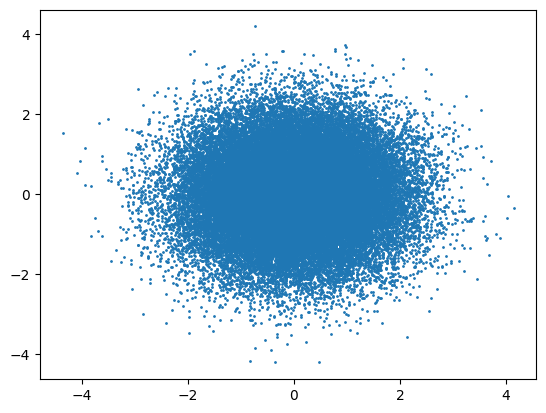

In [25]:
N = 50000
x, y = np.random.randn(N), np.random.randn(N)

plt.scatter(x, y, s=1)